In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
data = wb.DataReader('PG', data_source='yahoo',start='2000-1-1')

In [4]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,53.96875,52.84375,53.90625,53.59375,4275000.0,28.213228
2000-01-04,54.18750,51.87500,53.18750,52.56250,4270800.0,27.670355
2000-01-05,52.68750,51.25000,52.43750,51.56250,5098400.0,27.143930
2000-01-06,54.71875,52.53125,52.56250,53.93750,6524200.0,28.394205
2000-01-07,58.50000,54.59375,54.78125,58.25000,9832000.0,30.664419


In [9]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close,Resultado
Date,,,,,,,
2020-09-30,139.850006,137.809998,138.160004,138.990005,8727800.0,138.990005,0.012604
2020-10-01,139.990005,138.210007,139.580002,139.240005,5713400.0,139.240005,0.001799
2020-10-02,139.119995,136.949997,137.929993,138.119995,6077900.0,138.119995,-0.008044
2020-10-05,139.649994,138.300003,138.720001,139.389999,6333900.0,139.389999,0.009195
2020-10-06,139.779999,138.809998,139.419998,139.720001,1090843.0,139.720001,0.002367


In [8]:
data['Resultado'] = (data['Adj Close']/data['Adj Close'].shift(1))-1
print(data['Resultado'])

Date
2000-01-03         NaN
2000-01-04   -0.019242
2000-01-05   -0.019025
2000-01-06    0.046061
2000-01-07    0.079953
                ...   
2020-09-30    0.012604
2020-10-01    0.001799
2020-10-02   -0.008044
2020-10-05    0.009195
2020-10-06    0.002367
Name: Resultado, Length: 5224, dtype: float64


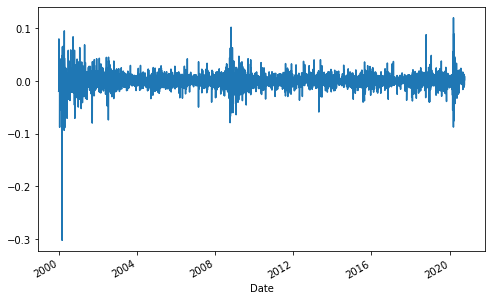

In [15]:
data['Resultado'].plot(figsize=(8,5))
plt.show()

In [18]:
media_anual = data['Resultado'].mean()*250
print(media_anual)
print(str(round(media_anual,5)*100)+'%')

0.10021782618690317
10.022%


In [19]:
data['RetLogaritmico'] = np.log(data['Adj Close']/data['Adj Close'].shift(1))
print(data['RetLogaritmico'])

Date
2000-01-03         NaN
2000-01-04   -0.019429
2000-01-05   -0.019208
2000-01-06    0.045032
2000-01-07    0.076918
                ...   
2020-09-30    0.012525
2020-10-01    0.001797
2020-10-02   -0.008076
2020-10-05    0.009153
2020-10-06    0.002365
Name: RetLogaritmico, Length: 5224, dtype: float64


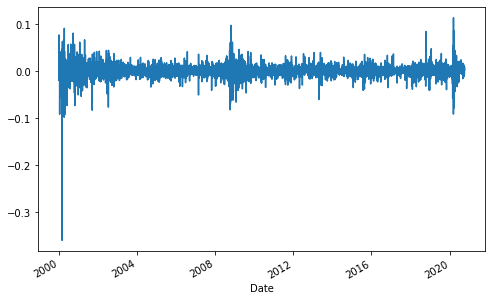

In [21]:
data['RetLogaritmico'].plot(figsize = (8,5))
plt.show()

In [23]:
medialog = data['RetLogaritmico'].mean()*250
print(str(round(medialog,5)*100)+'%')

7.6579999999999995%


In [25]:
carteiras = ['PG', 'MSFT', 'F', 'GE', 'AAPL']
database = pd.DataFrame()

In [28]:
for i in carteiras:
    database[i] = wb.DataReader(i, data_source='yahoo', start='2000-1-1')['Adj Close']


In [31]:
database.info()
database.head()
database.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5224 entries, 2000-01-03 to 2020-10-06
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      5224 non-null   float64
 1   MSFT    5224 non-null   float64
 2   F       5224 non-null   float64
 3   GE      5224 non-null   float64
 4   AAPL    5224 non-null   float64
dtypes: float64(5)
memory usage: 244.9 KB


,PG,MSFT,F,GE,AAPL
Date,,,,,
2020-09-30,138.990005,210.330002,6.660,6.230,115.809998
2020-10-01,139.240005,212.460007,6.750,6.240,116.790001
2020-10-02,138.119995,206.190002,6.890,6.390,113.019997
2020-10-05,139.389999,210.380005,7.020,6.410,116.500000
2020-10-06,140.100006,208.250000,7.155,6.485,115.019997


In [32]:
ret_carteiras = (database / database.shift(1))-1
ret_carteiras.head()

,PG,MSFT,F,GE,AAPL
Date,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.019242,-0.033780,-0.033413,-0.040000,-0.084311
2000-01-05,-0.019025,0.010544,0.003704,-0.001736,0.014634
2000-01-06,0.046061,-0.033498,0.001230,0.013369,-0.086539
2000-01-07,0.079953,0.013068,0.073710,0.038721,0.047368


In [33]:
pesos = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [34]:
np.dot(ret_carteiras,pesos)

array([        nan, -0.04214909,  0.00162413, ..., -0.00501124,
        0.01646098,  0.00263931])

In [43]:
mediacarteiras = ret_carteiras.mean()*100
print(mediacarteiras)

PG      0.040139
MSFT    0.052025
F       0.020606
GE     -0.003909
AAPL    0.128066
dtype: float64


In [39]:
np.dot(mediaretornoanual,pesos)

0.11846359744881858

In [40]:
portifolio = str(round(np.dot(mediaretornoanual,pesos),5)*100)+'%'
print(portifolio)

11.846%


In [44]:
pesos2 = np.array([0.3, 0.3, 0.15, 0.01, 0.24])
portifolio2 = str(round(np.dot(mediaretornoanual, pesos2),5)*100) + '%'
print(portifolio2)

15.359%


In [46]:
ind_carteiras = ['^GSPC', '^IXIC', '^GDAXI']
indicadores = pd.DataFrame()
for t in ind_carteiras:
    indicadores[t] = wb.DataReader(t, data_source='yahoo',start='2000-1-1')['Adj Close']

In [47]:
indicadores.head()

,^GSPC,^IXIC,^GDAXI
Date,,,
2000-01-03,1455.219971,4131.149902,6750.759766
2000-01-04,1399.420044,3901.689941,6586.950195
2000-01-05,1402.109985,3877.540039,6502.069824
2000-01-06,1403.449951,3727.129883,6474.919922
2000-01-07,1441.469971,3882.620117,6780.959961


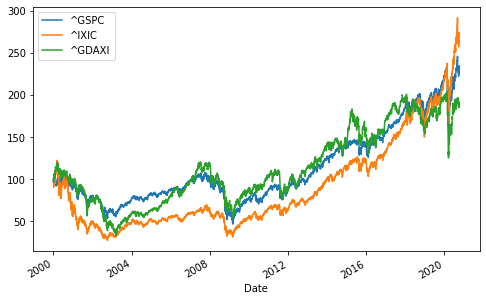

In [48]:
(indicadores/indicadores.iloc[0]*100).plot(figsize=(8,5))
plt.show()

In [49]:
retindicadores = (indicadores/indicadores.shift(1))-1
retindicadores.tail()

,^GSPC,^IXIC,^GDAXI
Date,,,
2020-09-30,0.008254,0.007421,-0.005075
2020-10-01,0.005293,0.014238,-0.002348
2020-10-02,-0.009578,-0.022204,-0.003278
2020-10-05,0.017973,0.023248,0.010976
2020-10-06,0.001531,-0.001101,0.006058


In [50]:
retindicadoresanuais = retindicadores.mean()*250
print(retindicadoresanuais)

^GSPC     0.060558
^IXIC     0.080426
^GDAXI    0.044879
dtype: float64


In [51]:
"""
Estimando os riscos de um investimento
"""
carteiras = ['PG','AAPL']
database = pd.DataFrame()
for i in carteiras:
    database[i] = wb.DataReader(i,
                               data_source='yahoo',
                               start='2010-1-1')['Adj Close']
database.tail()

,PG,AAPL
Date,,
2020-09-30,138.990005,115.809998
2020-10-01,139.240005,116.790001
2020-10-02,138.119995,113.019997
2020-10-05,139.389999,116.500000
2020-10-06,140.425003,115.580002


In [53]:
retorno = np.log(database/database.shift(1))
print(retorno)

                  PG      AAPL
Date                          
2010-01-04       NaN       NaN
2010-01-05  0.000327  0.001727
2010-01-06 -0.004755 -0.016034
2010-01-07 -0.005438 -0.001850
2010-01-08 -0.001323  0.006626
...              ...       ...
2020-09-30  0.012525  0.014963
2020-10-01  0.001797  0.008427
2020-10-02 -0.008076 -0.032813
2020-10-05  0.009153  0.030327
2020-10-06  0.007398 -0.007928

[2709 rows x 2 columns]
